In [1]:
# installation of Weights & Biases
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [2]:
# import of libraries
import wandb
import pandas as pd
import numpy as np
from google.colab import drive
from zipfile import ZipFile
import os
from random import shuffle
from PIL import Image
import random
import matplotlib.pyplot as plt
import tempfile
import logging

# Getting the data

In [3]:
drive.mount('/content/gdrive')
path_arquive_zip = "/content/gdrive/MyDrive/animation-detection/data/archive.zip"
destination_folder = "/content/destination/"

# certifies the existence of the destination folder
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# open and extract the zip file
with ZipFile(path_arquive_zip, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)
    print(".zip file unzipped success.")

Mounted at /content/gdrive
.zip file unzipped success.


# Converting the data to save in wandb

## Fetch the imagens and  putting on a numpy array

In [4]:
# arrays where we'll put the image data and their labels
img_data = []
img_label = []

In [5]:
# list the anime folder
destination_folder_anime = destination_folder + "/Training Data/Anime/"
for folder in os.listdir(destination_folder_anime):
  anime_folder = (os.listdir(destination_folder_anime + folder))
  # list the archives in each of the anime folders
  for img in anime_folder:
    # open the image with PIL library
    im = Image.open(destination_folder_anime + "/" + folder + "/" + img)
    # convert the image to RGBA mode if it is not in the format
    if im.mode != 'RGBA':
      im = im.convert('RGBA')
    # remise the imagens to same size
    im = im.resize((128, 128))
    # transforme the image into a numpy array wiht the shape 128, 128, 4
    im = np.array(im, dtype='float32')
    # normalizing the pixel values of each image involves dividing each pixel value by 255 (the maximum possible value)
    im/=255
    # append the data on the arrays
    img_data.append(im)
    img_label.append(0)

In [6]:
# same process, but with cartons
destination_folder_cartoon = destination_folder + "/Training Data/Cartoon/"
for folder in os.listdir(destination_folder_cartoon):
  cartoon_folder = (os.listdir(destination_folder_cartoon + folder))
  for img in cartoon_folder:
    im = Image.open(destination_folder_cartoon + "/" + folder + "/" + img)
    if im.mode != 'RGBA':
      im = im.convert('RGBA')
    im = im.resize((128, 128))
    im = np.array(im, dtype='float32')
    im/=255
    img_data.append(im)
    img_label.append(1)

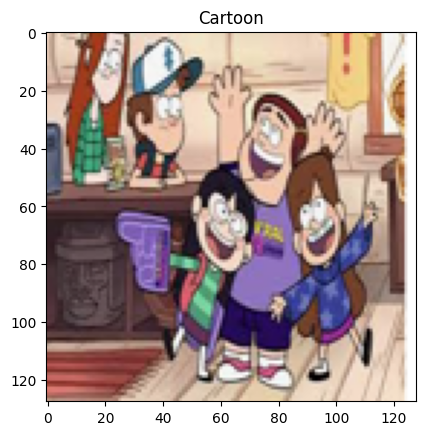

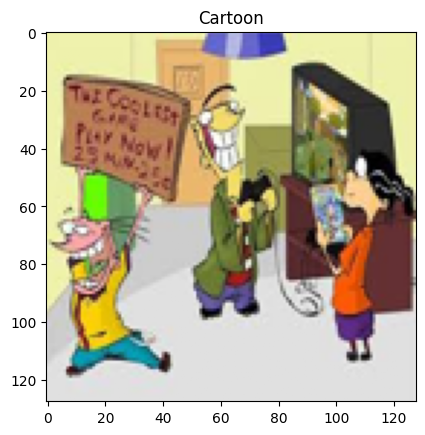

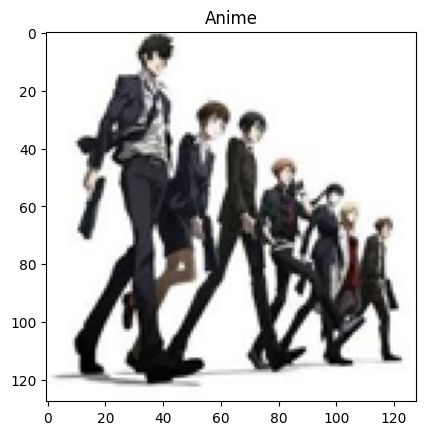

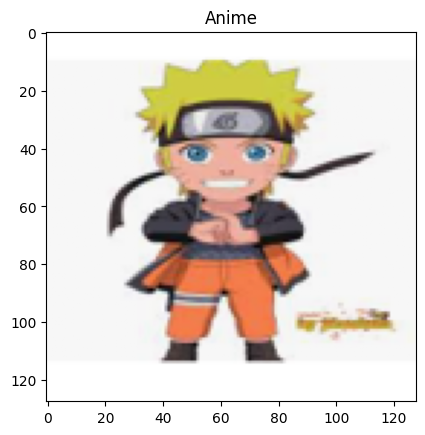

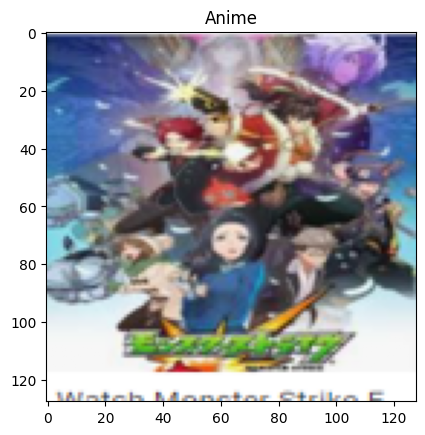

In [7]:
# showing some random examples of data
labels = {0:'Anime', 1:'Cartoon'}

for i in range(5):
    n = random.randint(0, len(img_data))
    plt.figure()
    plt.title(labels[img_label[n]])
    plt.imshow(img_data[n])

## Saving the data of the images in a npy archive

In [8]:
# save the array in a npy archive
np.save('img_data.npy', img_data)

### How to get the data of a numpy archive

In [9]:
# load the data of the npy into the variable loaded_data
loaded_data = np.load('img_data.npy')

# print the loaded data
print(loaded_data)

[[[[1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   ...
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]]

  [[1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   ...
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]]

  [[1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   ...
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]]

  ...

  [[1.         1.         1.         1.        ]
   [1.         1.         1.       

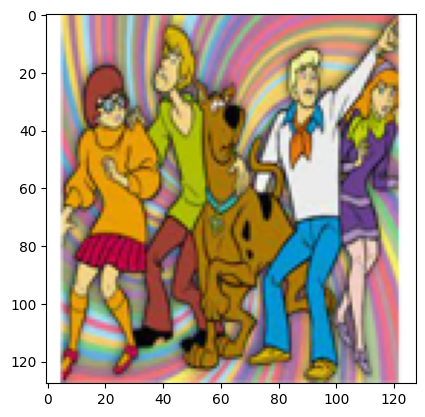

In [10]:
# random number used to confirm if the conversion is correct
n = random.randint(0, len(img_data))
# img in the original array
plt.imshow(img_data[n])

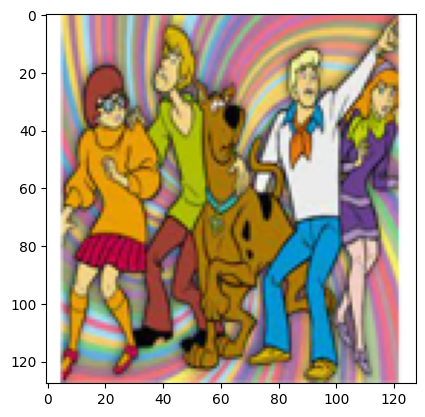

In [11]:
# img in the loaded array
plt.imshow(loaded_data[n])

## Saving the label of the data in csv

In [12]:
# creating a dictionary with the label array
data = {"animation Type" : img_label}
# transforming into a dataframe
df = pd.DataFrame(data)
# saving the dataframe into a csv
df.to_csv("label_data.csv", index=False)

## Preprocessing the data

### Checking if we have the same quantity of imagens and labels

In [13]:
if (len(loaded_data) == len(df["animation Type"])):
  print("same quantity")
else:
  print("not same quantity")

same quantity


### Checking NaN values

In [14]:
has_nan_img = np.isnan(loaded_data)
print("has NaN:", np.any(has_nan_img))

has_nan_label = np.isnan(df["animation Type"])
print("has NaN:", np.any(has_nan_label))

has NaN: False
has NaN: False


### we dont need any normalization after transform the images in a numpyarray

# Creating the artifacts and putting into wandb

In [15]:
# wandb login
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [16]:
# Initializing a W&B run to add the 'raw_data' artifact.
run = wandb.init(entity="flamigos", project="cnn_animation", job_type="fetch_and_preprocess")

wandb: Currently logged in as: valmirfrancisco1 (flamigos). Use `wandb login --relogin` to force relogin


In [17]:
# creating a wandb artifact
artifact = wandb.Artifact(name="img_data",
                                  type="clean_data",
                                  description="data from the imagens")

# add the file to the artifact
artifact.add_file('img_data.npy')
# save the artifact in W&B
wandb.run.log_artifact(artifact)

# creating a wandb artifact
artifact2 = wandb.Artifact(name="label_data",
                                  type="clean_data",
                                  description="data from the labels")

# add the file to the artifact
artifact2.add_file('label_data.csv')
# save the artifact in W&B
wandb.run.log_artifact(artifact2)

<Artifact label_data>

In [18]:
# finish the run
run.finish()